In [1]:
# Load python modules
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow_datasets as tfds
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tqdm import tqdm  # Perform iterature with progress bar
import numpy as np
import PIL.Image
import PIL
import cv2
import os


In [2]:
#Class labelsb
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
image_size = (32, 32)

In [3]:
print('Number of classes:', nb_classes)

Number of classes: 4


In [4]:
class_names_label

{'Glass': 0, 'Metal': 1, 'Paper': 2, 'Textile': 3}

In [5]:
def load_data():
    """
        Load the data from local folder
        
    """
    datasets = ['C:/Mani/Dataset/dataset1/train_ds',
               'C:/Mani/Dataset/dataset1/test_ds']
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [6]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/Dataset/dataset1/train_ds


100%|████████████████████████████████████████████████████████████████████████████████| 270/270 [00:03<00:00, 73.06it/s]


Loading C:/Mani/Dataset/dataset1/test_ds


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.31it/s]


In [7]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((1080, 32, 32, 3), (200, 32, 32, 3))

In [8]:
# Shuffle only the training dataset
np.random.seed(321)
train_images, train_labels = shuffle(train_images, train_labels)

In [9]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 1080


In [10]:
#Normalise train and test image dataset from 0,255 to 0,1
train_images = train_images / 255.0 
test_images = test_images / 255.0

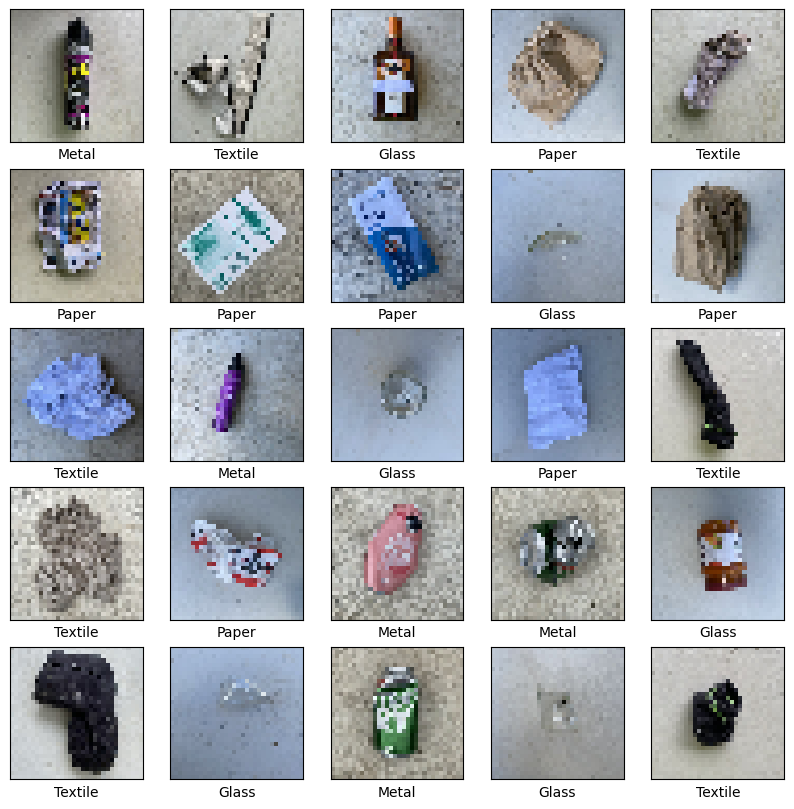

In [11]:
#Display 25 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
#Sequential Model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32, 32 ,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,444 (1.61 MB)

 Trainable params: 421,444 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Sequential Model 2 with image size 128, 128, 3
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
       
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,452 (783.02 KB)

 Trainable params: 200,452 (783.02 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Sequential Model 3 
# Build a deep model 
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,012 (871.14 KB)

 Trainable params: 223,012 (871.14 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Add callbacks to save the model weight with best accuracy during training
# import ModelCheckpoint package
# from tensorflow.keras.callbacks import ModelCheckpoint
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

checkpoint_filepath1 = 'C:/Mani/ModelCheckpoint/model1.keras'
model_checkpoint_callback1 = ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


checkpoint_filepath2 = 'C:/Mani/ModelCheckpoint/model2.keras'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

checkpoint_filepath3 = 'C:/Mani/ModelCheckpoint/model3.keras'
model_checkpoint_callback3 = ModelCheckpoint(
    filepath=checkpoint_filepath3,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [16]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])


model_2.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])


model_3.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
               

In [17]:
# Set number of epochs
epochs = 100
batch_size = 32



In [18]:
#Model 1 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history1 = model_1.fit(train_images, train_labels,
                      batch_size=batch_size, epochs=epochs,
                      validation_split = 0.2, verbose=1,
                      callbacks=[model_checkpoint_callback1])


# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_1_training_time', end_time - start_time )

Time model start: 2024-11-07 09:15:36.647579
Epoch 1/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2925 - loss: 1.3827
Epoch 1: val_accuracy improved from -inf to 0.50463, saving model to C:/Mani/ModelCheckpoint/model1.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3042 - loss: 1.3726 - val_accuracy: 0.5046 - val_loss: 1.1487
Epoch 2/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5453 - loss: 1.0823
Epoch 2: val_accuracy did not improve from 0.50463
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5461 - loss: 1.0783 - val_accuracy: 0.5000 - val_loss: 1.0056
Epoch 3/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5964 - loss: 0.9258
Epoch 3: val_accuracy improved from 0.50463 to 0.56944, saving model to C:/Mani/ModelCheckpoint/model1.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5961 - loss: 0.9257 - val_accuracy: 0.5694 - val_loss: 0.9411
Epoch 4/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5956 - loss: 0.90

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9943 - loss: 0.0682 - val_accuracy: 0.7407 - val_loss: 0.8144
Epoch 25/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9989 - loss: 0.0499
Epoch 25: val_accuracy did not improve from 0.75463
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9989 - loss: 0.0496 - val_accuracy: 0.7315 - val_loss: 0.8861
Epoch 26/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0337
Epoch 26: val_accuracy did not improve from 0.75463
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0335 - val_accuracy: 0.7407 - val_loss: 0.8758
Epoch 27/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9999 - loss: 0.0276
Epoch 27: val_accuracy did not improve from 0.75463
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9998 - loss: 0.0277 - val_accuracy: 0.7454 - val_loss: 0.8755
Epoch 28/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0231
Epoch 28: val_accuracy did not i

Epoch 50/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 50: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.7407 - val_loss: 1.2201
Epoch 51/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 51: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.7407 - val_loss: 1.1951
Epoch 52/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 52: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.7407 - val_loss: 1.2088
Epoch 53/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 53: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.7407

26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 7.6747e-04
Epoch 75: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 7.6644e-04 - val_accuracy: 0.7315 - val_loss: 1.3549
Epoch 76/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 6.5266e-04
Epoch 76: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 6.5997e-04 - val_accuracy: 0.7361 - val_loss: 1.3585
Epoch 77/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 6.7155e-04
Epoch 77: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 6.7388e-04 - val_accuracy: 0.7407 - val_loss: 1.3603
Epoch 78/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 6.3771e-04
Epoch 78: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 6.4022e-04 - v

Epoch 100/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 3.2579e-04
Epoch 100: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 3.2627e-04 - val_accuracy: 0.7361 - val_loss: 1.4589
Time model end: 2024-11-07 09:16:25.708075
Model_1_training_time 0:00:49.060496


In [19]:
# Model 2 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)


history2 = model_2.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback2])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_2_training_time', end_time - start_time )

Time model start: 2024-11-07 09:16:25.715670
Epoch 1/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2735 - loss: 1.3982
Epoch 1: val_accuracy improved from -inf to 0.23611, saving model to C:/Mani/ModelCheckpoint/model2.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2729 - loss: 1.3973 - val_accuracy: 0.2361 - val_loss: 1.3581
Epoch 2/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3597 - loss: 1.3194
Epoch 2: val_accuracy improved from 0.23611 to 0.40741, saving model to C:/Mani/ModelCheckpoint/model2.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3628 - loss: 1.3184 - val_accuracy: 0.4074 - val_loss: 1.2126
Epoch 3/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4026 - loss: 1.2225
Epoch 3: val_accuracy improved from 0.40741 to 0.50463, saving model to C:/Mani/ModelCheckpoint/model2.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4080 - loss: 1.2211 - val_accuracy: 0.5046 - val_loss: 1.2083
Epoch 4/100
24/27 ━━━━━━━

Epoch 25/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9921 - loss: 0.0391
Epoch 25: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9916 - loss: 0.0405 - val_accuracy: 0.7176 - val_loss: 1.0087
Epoch 26/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9962 - loss: 0.0290
Epoch 26: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9962 - loss: 0.0290 - val_accuracy: 0.7500 - val_loss: 0.9694
Epoch 27/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0132
Epoch 27: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 0.7222 - val_loss: 1.1060
Epoch 28/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 28: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.7222

25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 5.5370e-04
Epoch 50: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 5.5613e-04 - val_accuracy: 0.7315 - val_loss: 1.5034
Epoch 51/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 4.9005e-04
Epoch 51: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 4.9363e-04 - val_accuracy: 0.7269 - val_loss: 1.5135
Epoch 52/100
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 4.7664e-04
Epoch 52: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 4.7600e-04 - val_accuracy: 0.7315 - val_loss: 1.5270
Epoch 53/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 4.0479e-04
Epoch 53: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 4.0677e-04 - v

Epoch 75/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 1.4732e-04
Epoch 75: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 1.4648e-04 - val_accuracy: 0.7315 - val_loss: 1.7362
Epoch 76/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 1.2005e-04
Epoch 76: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 1.2111e-04 - val_accuracy: 0.7315 - val_loss: 1.7241
Epoch 77/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 1.3344e-04
Epoch 77: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 1.3244e-04 - val_accuracy: 0.7269 - val_loss: 1.7533
Epoch 78/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 1.2470e-04
Epoch 78: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 1

Epoch 100/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 4.4887e-05
Epoch 100: val_accuracy did not improve from 0.75000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 4.4824e-05 - val_accuracy: 0.7315 - val_loss: 1.9218
Time model end: 2024-11-07 09:17:26.811090
Model_2_training_time 0:01:01.095420


In [20]:
#Model 3 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history3 = model_3.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback3])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_3_training_time', end_time - start_time )

Time model start: 2024-11-07 09:17:26.820009
Epoch 1/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2415 - loss: 1.3898
Epoch 1: val_accuracy improved from -inf to 0.23148, saving model to C:/Mani/ModelCheckpoint/model3.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2417 - loss: 1.3894 - val_accuracy: 0.2315 - val_loss: 1.3773
Epoch 2/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3923 - loss: 1.3386
Epoch 2: val_accuracy improved from 0.23148 to 0.50463, saving model to C:/Mani/ModelCheckpoint/model3.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3954 - loss: 1.3337 - val_accuracy: 0.5046 - val_loss: 1.1121
Epoch 3/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5137 - loss: 1.0767
Epoch 3: val_accuracy did not improve from 0.50463
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5149 - loss: 1.0751 - val_accuracy: 0.5000 - val_loss: 1.0783
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5326 - loss: 1.01

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9367 - loss: 0.1667 - val_accuracy: 0.7593 - val_loss: 0.8617
Epoch 25/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9731 - loss: 0.1005
Epoch 25: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9730 - loss: 0.1005 - val_accuracy: 0.6991 - val_loss: 1.0632
Epoch 26/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9799 - loss: 0.0567
Epoch 26: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9800 - loss: 0.0571 - val_accuracy: 0.7546 - val_loss: 0.9687
Epoch 27/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9977 - loss: 0.0313
Epoch 27: val_accuracy did not improve from 0.75926
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9977 - loss: 0.0312 - val_accuracy: 0.7546 - val_loss: 1.1043
Epoch 28/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9946 - loss: 0.0205
Epoch 28: val_accuracy did not i

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 1.0000 - loss: 3.7419e-04 - val_accuracy: 0.7500 - val_loss: 1.6911
Epoch 50/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 3.7509e-04
Epoch 50: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 3.7257e-04 - val_accuracy: 0.7500 - val_loss: 1.7043
Epoch 51/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 3.1546e-04
Epoch 51: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 3.1578e-04 - val_accuracy: 0.7546 - val_loss: 1.7149
Epoch 52/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 3.1164e-04
Epoch 52: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 3.1133e-04 - val_accuracy: 0.7500 - val_loss: 1.7218
Epoch 53/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 2.9041e-04


26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 1.1777e-04
Epoch 74: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 1.1855e-04 - val_accuracy: 0.7546 - val_loss: 1.8961
Epoch 75/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 1.2919e-04
Epoch 75: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 1.2873e-04 - val_accuracy: 0.7546 - val_loss: 1.9056
Epoch 76/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 1.3263e-04
Epoch 76: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 1.3214e-04 - val_accuracy: 0.7546 - val_loss: 1.9110
Epoch 77/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 1.1656e-04
Epoch 77: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 1.1646e-04 - v

Epoch 99/100
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 5.9548e-05
Epoch 99: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 5.9807e-05 - val_accuracy: 0.7546 - val_loss: 2.0385
Epoch 100/100
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 5.7807e-05
Epoch 100: val_accuracy did not improve from 0.77778
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 5.8007e-05 - val_accuracy: 0.7546 - val_loss: 2.0471
Time model end: 2024-11-07 09:18:53.374640
Model_3_training_time 0:01:26.554631


Text(0.5, 1.0, 'Model_1 Accuracy (Exp:1.0)')

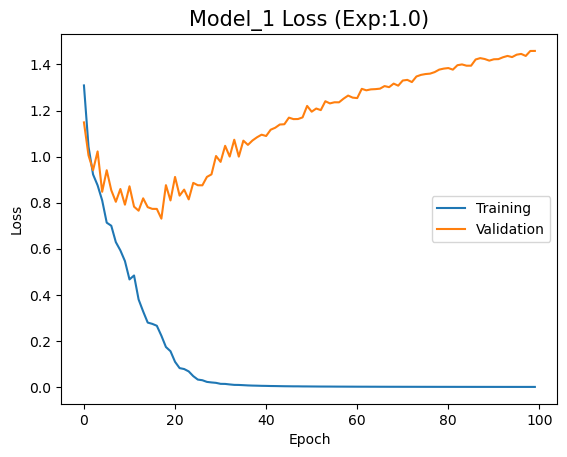

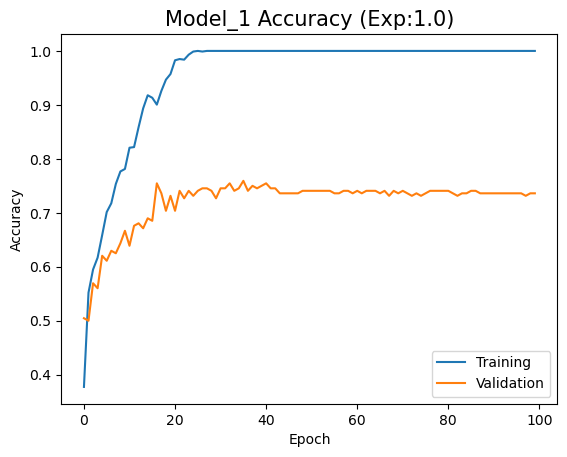

In [21]:

#Plot the training and validation loss
plt.figure()
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_1 Loss (Exp:1.0)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_1 Accuracy (Exp:1.0)', fontsize = 15)


Text(0.5, 1.0, 'Model_2 Accuracy (Exp:1.0)')

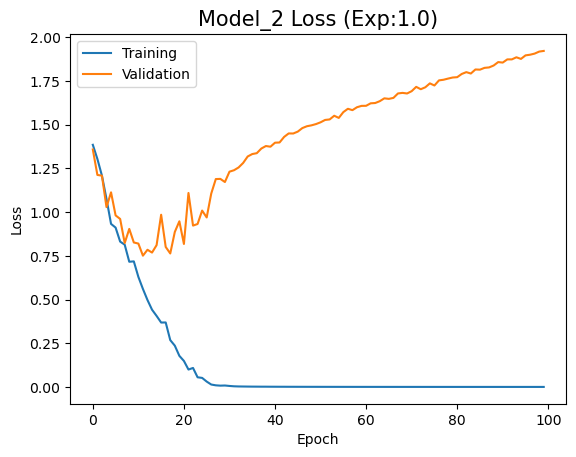

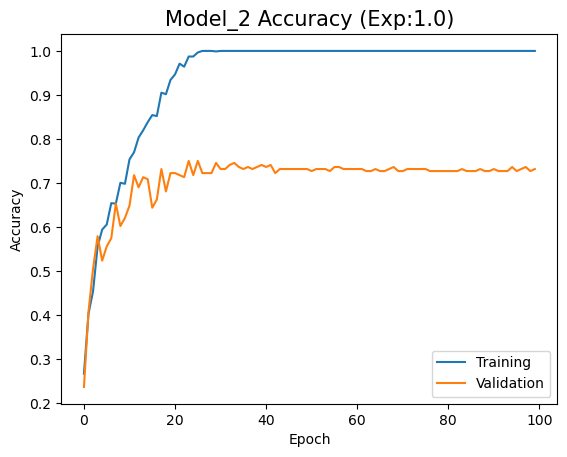

In [22]:
#Plot the training and validation loss
plt.figure()
plt.plot(history2.history['loss'], label='Training')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_2 Loss (Exp:1.0)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_2 Accuracy (Exp:1.0)', fontsize = 15)

Text(0.5, 1.0, 'Model_3 Accuracy (Exp:1.0)')

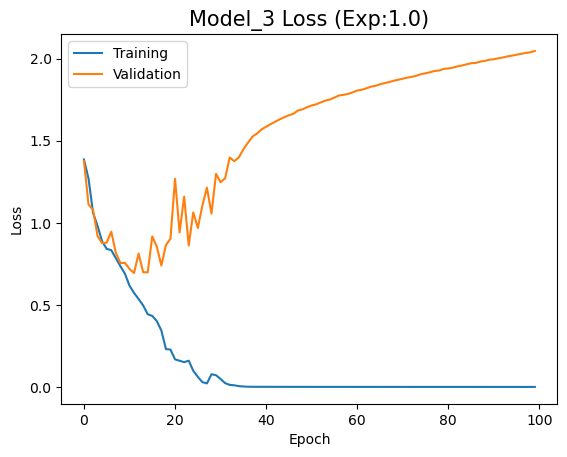

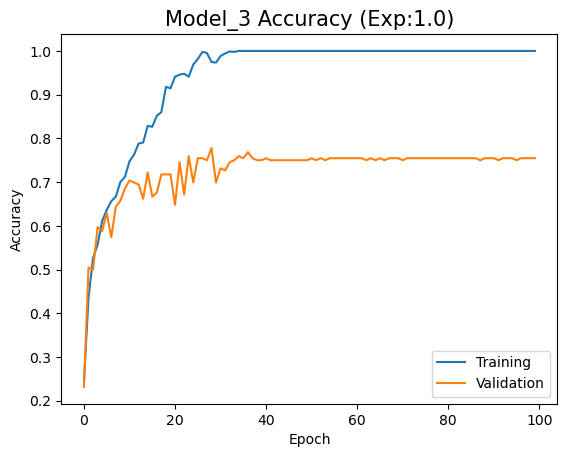

In [23]:
#Plot the training and validation loss
plt.figure()
plt.plot(history3.history['loss'], label='Training')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_3 Loss (Exp:1.0)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_3 Accuracy (Exp:1.0)', fontsize = 15)

In [24]:
# Evaluate the test result for model 1, 2, 3
Test_result1 = model_1.evaluate(test_images, test_labels, batch_size = 64)

Test_result2 = model_2.evaluate(test_images, test_labels, batch_size = 64)

Test_result3 = model_3.evaluate(test_images, test_labels, batch_size = 64)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7283 - loss: 1.5163 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7552 - loss: 1.5454
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7201 - loss: 2.0655


In [25]:
predictions1 = model_1.predict(test_images)     # Vector of probabilities
pred_label1 = np.argmax(predictions1, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [26]:
predictions2 = model_2.predict(test_images)     # Vector of probabilities
pred_label2 = np.argmax(predictions2, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [27]:
predictions3 = model_3.predict(test_images)     # Vector of probabilities
pred_label3 = np.argmax(predictions3, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


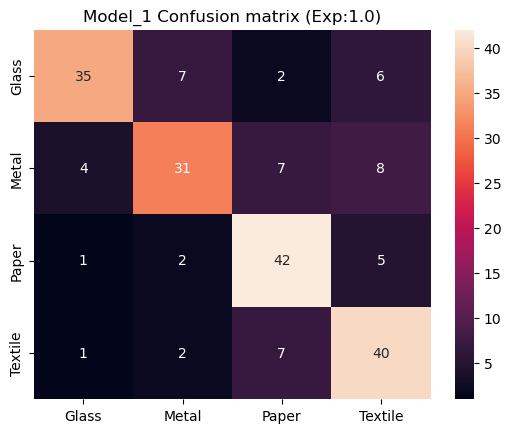

In [28]:
CM = confusion_matrix(test_labels, pred_label1)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_1 Confusion matrix (Exp:1.0)')
plt.show()

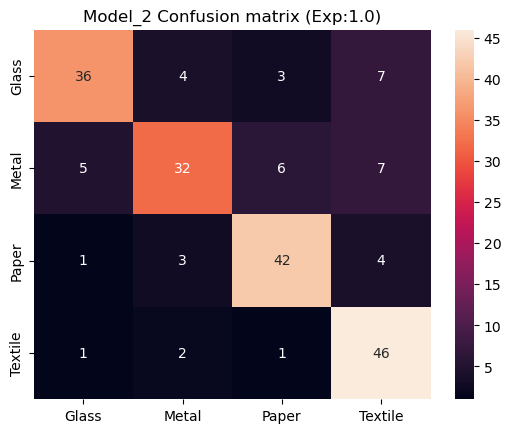

In [29]:
CM = confusion_matrix(test_labels, pred_label2)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_2 Confusion matrix (Exp:1.0)')
plt.show()


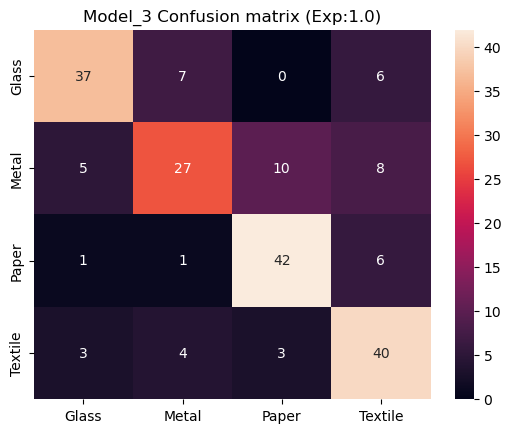

In [30]:
CM = confusion_matrix(test_labels, pred_label3)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_3 Confusion matrix (Exp:1.0)')
plt.show()
